## Analysis

1. Data Flow & sources
2. Database set-up
3. Movies per year
4. Movies without budget
5. Rev/Budger per year (line graph?)
6. % of movies with minorities in lead role vs. A-list celebrities per year (trend is increasing or dec)
7. Box office for minorities for the decade
8. Box office for A-list for the decade
9. 

In [76]:
from copy import deepcopy

In [100]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * FROM details""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]

cnx.commit()
c.close()
cnx.close()

In [101]:
import config
import mysql.connector
import pandas as pd

In [102]:
df.head()

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en
1,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en
2,1865,tt1298650,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,16.651,2011-05-14,6.4,8916,136.0,US,en
3,1930,tt0948470,The Amazing Spider-Man,215000000.0,7.522159e+08,29.837,2012-06-27,6.5,10849,136.0,US,en
4,4258,tt0795461,Scary Movie 5,20000000.0,7.837874e+07,15.520,2013-04-11,4.7,1590,86.0,US,en


In [103]:
df['year'] = df['release_date'].map(lambda x : x.year)

In [104]:
df.groupby(['year']).mean()

,id,budget,revenue,popularity,vote_average,vote_count,runtime
year,,,,,,,
2010,44331.168421,2.366545e+07,5.984909e+07,9.459250,6.291842,1044.739474,101.187831
2011,65772.660526,2.270120e+07,5.963441e+07,9.354895,6.269474,1028.144737,100.552632
2012,98405.236842,2.171537e+07,6.658601e+07,9.647884,6.220526,1178.544737,102.981383
2013,153125.665789,2.322403e+07,6.450677e+07,10.311639,6.336053,1357.155263,104.023747
2014,223972.307895,2.169719e+07,6.923004e+07,11.646566,6.367368,1502.860526,103.868421
2015,289184.818421,2.082544e+07,7.220798e+07,10.719324,6.190000,1299.331579,104.531915
2016,328707.344633,2.573396e+07,7.569283e+07,11.481630,6.328531,1554.471751,106.849858
2017,387644.738292,2.283617e+07,7.930030e+07,12.093129,6.338292,1351.931129,105.423823
2018,439251.416357,2.662842e+07,9.359867e+07,16.013885,6.459851,1272.011152,108.644195


In [105]:
df['budgetm'] = df['budget'].map(lambda x :x/1000000)

In [106]:
df

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,year,budgetm
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,2014,65.000000
1,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,2011,140.000000
2,1865,tt1298650,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,16.651,2011-05-14,6.4,8916,136.0,US,en,2011,380.000000
3,1930,tt0948470,The Amazing Spider-Man,215000000.0,7.522159e+08,29.837,2012-06-27,6.5,10849,136.0,US,en,2012,215.000000
4,4258,tt0795461,Scary Movie 5,20000000.0,7.837874e+07,15.520,2013-04-11,4.7,1590,86.0,US,en,2013,20.000000
5,7978,tt0780653,The Wolfman,150000000.0,0.000000e+00,15.150,2010-02-11,5.7,1058,102.0,US,en,2010,150.000000
6,8967,tt0478304,The Tree of Life,32000000.0,5.467423e+07,8.301,2011-05-18,6.6,1802,139.0,US,en,2011,32.000000
7,9364,tt1181614,Wuthering Heights,8000000.0,1.009150e+05,5.765,2011-09-05,6.1,118,129.0,non-US,en,2011,8.000000
8,9543,tt0473075,Prince of Persia: The Sands of Time,150000000.0,3.351546e+08,14.189,2010-05-19,6.2,4231,116.0,US,en,2010,150.000000
9,10138,tt1228705,Iron Man 2,200000000.0,6.239333e+08,27.955,2010-04-28,6.8,13003,124.0,US,en,2010,200.000000


In [107]:
df['revm'] = df['revenue'].map(lambda x : x/1000000)

In [108]:
# df.isna().sum()

In [109]:
sum(df.budget == 0)


1331

In [110]:
sum(df.budget >0)

1935

In [111]:
len(df)

3266

In [112]:
sum(df.budget == 0)/len(df)


0.4075321494182486

In [113]:
df['production_country'].value_counts()

US        2171
non-US    1095
Name: production_country, dtype: int64

In [114]:
df = df[df['production_country'] == 'US']

In [115]:
df

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,year,budgetm,revm
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,2014,65.000000,39.407616
1,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,2011,140.000000,370.569774
2,1865,tt1298650,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,16.651,2011-05-14,6.4,8916,136.0,US,en,2011,380.000000,1045.713802
3,1930,tt0948470,The Amazing Spider-Man,215000000.0,7.522159e+08,29.837,2012-06-27,6.5,10849,136.0,US,en,2012,215.000000,752.215857
4,4258,tt0795461,Scary Movie 5,20000000.0,7.837874e+07,15.520,2013-04-11,4.7,1590,86.0,US,en,2013,20.000000,78.378744
5,7978,tt0780653,The Wolfman,150000000.0,0.000000e+00,15.150,2010-02-11,5.7,1058,102.0,US,en,2010,150.000000,0.000000
6,8967,tt0478304,The Tree of Life,32000000.0,5.467423e+07,8.301,2011-05-18,6.6,1802,139.0,US,en,2011,32.000000,54.674226
8,9543,tt0473075,Prince of Persia: The Sands of Time,150000000.0,3.351546e+08,14.189,2010-05-19,6.2,4231,116.0,US,en,2010,150.000000,335.154643
9,10138,tt1228705,Iron Man 2,200000000.0,6.239333e+08,27.955,2010-04-28,6.8,13003,124.0,US,en,2010,200.000000,623.933331
10,10140,tt0980970,The Chronicles of Narnia: The Voyage of the Da...,155000000.0,4.156862e+08,15.550,2010-08-13,6.3,3372,113.0,US,en,2010,155.000000,415.686217


In [116]:
df['language'].value_counts()

en    2160
es       3
ja       2
fr       2
de       1
zh       1
el       1
it       1
Name: language, dtype: int64

In [117]:
df[df['language'] != 'en']

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,year,budgetm,revm
77,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,2010,14.00,0.000000
340,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,2010,0.00,0.000000
896,81857,tt1859446,Alps,0.0,0.0,5.214,2011-09-01,6.3,118,93.0,US,el,2011,0.00,0.000000
1136,110398,tt2059255,No,0.0,2341226.0,4.950,2012-08-07,7.2,221,118.0,US,es,2012,0.00,2.341226
1224,123103,tt1780762,Aftershock,2000000.0,58510.0,9.001,2012-09-12,5.2,182,89.0,US,es,2012,2.00,0.058510
1477,170522,tt3759416,Asterix: The Mansions of the Gods,30000000.0,0.0,12.908,2014-11-26,6.8,746,85.0,US,fr,2014,30.00,0.000000
2440,335788,tt4106376,Renegades,66190000.0,0.0,13.280,2017-08-21,5.7,182,105.0,US,fr,2017,66.19,0.000000
2603,355277,tt4629266,Born in China,0.0,0.0,5.970,2016-08-12,7.4,82,76.0,US,zh,2016,0.00,0.000000
2765,390734,tt5595168,Kingsglaive: Final Fantasy XV,0.0,269980.0,8.547,2016-07-09,6.8,366,115.0,US,ja,2016,0.00,0.269980
2970,426426,tt6155172,Roma,15000000.0,0.0,13.253,2018-08-25,7.8,2067,135.0,US,es,2018,15.00,0.000000


In [118]:
df = df[df['language'] == 'en']

In [119]:
df['revm'].value_counts()

0.000000      656
0.176391        1
0.017479        1
10.501938       1
0.072689        1
21.520719       1
68.267862       1
114.178613      1
41.657844       1
73.100172       1
293.329073      1
7.600000        1
59.389433       1
60.700000       1
2.115765        1
0.018612        1
11.417362       1
98.450062       1
1.776935        1
173.965010      1
962.119864      1
84.025816       1
85.978266       1
52.395996       1
54.956140       1
140.312928      1
26.121638       1
37.807625       1
3.814868        1
0.009747        1
             ... 
469.160692      1
91.709827       1
13.603453       1
203.388186      1
327.803731      1
112.343513      1
0.653951        1
68.263166       1
357.852395      1
0.021833        1
51.029361       1
543.934787      1
1.585582        1
275.293450      1
538.983207      1
0.032163        1
10.076790       1
237.382724      1
389.681935      1
41.063475       1
624.026776      1
177.584879      1
196.114570      1
31.554855       1
49.779728 

In [120]:
import seaborn as sns

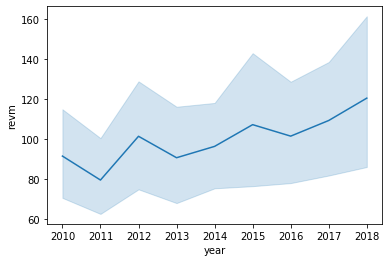

In [121]:
sns.lineplot(x = 'year', y = 'revm', data=df)

In [122]:
df.groupby('year').mean()

,id,budget,revenue,popularity,vote_average,vote_count,runtime,budgetm,revm
year,,,,,,,,,
2010,37808.905172,3.439426e+07,9.157113e+07,10.554220,6.179741,1511.818966,97.737069,34.394257,91.571131
2011,62854.868726,3.006775e+07,7.959732e+07,9.890266,6.145946,1293.351351,98.861004,30.067747,79.597325
2012,87209.686695,3.214402e+07,1.014576e+08,10.643069,6.122747,1721.931330,100.957082,32.144017,101.457628
2013,138387.576000,3.208671e+07,9.074596e+07,11.229920,6.202000,1801.196000,102.224000,32.086713,90.745960
2014,211567.448669,2.879278e+07,9.641293e+07,12.838525,6.290494,1886.418251,102.680608,28.792776,96.412933
2015,269836.531381,2.999640e+07,1.072699e+08,12.028607,6.121757,1801.845188,103.669456,29.996403,107.269891
2016,310948.600000,3.471542e+07,1.015303e+08,12.301404,6.267083,2008.879167,106.799163,34.715417,101.530278
2017,373331.272727,3.149868e+07,1.093488e+08,13.276587,6.299587,1867.285124,105.053719,31.498677,109.348811
2018,422486.272277,3.452405e+07,1.205131e+08,17.483559,6.420792,1575.326733,108.386139,34.524052,120.513064


In [123]:
sum(df.revm == 0)/len(df)


0.3037037037037037

In [124]:
len(df[(df['revm'] == 0) | (df['budget'] == 0)])/len(df)



0.40046296296296297

In [125]:
len(df)

2160

In [126]:
len(df[(df['revm'] == 0) | (df['budget'] == 0)])

865

In [127]:
major_movies = df[(df['revm'] != 0) & (df['budget'] != 0)]

In [128]:
len(major_movies)

1295

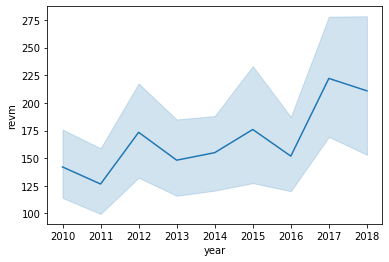

In [145]:
sns.lineplot(x = 'year', y = 'revm', data=major_movies)

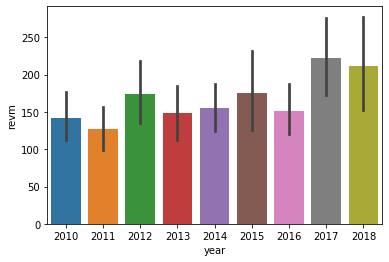

In [147]:
sns.barplot(x='year', y='revm', data= major_movies)

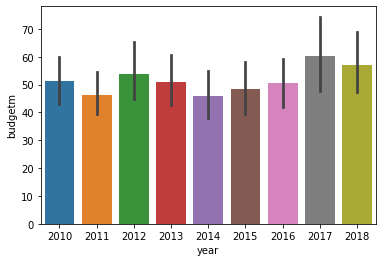

In [148]:
sns.barplot(x='year', y='budgetm', data= major_movies)

In [ ]:
import config
import mysql.connector
import pandas as pd

In [225]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * FROM actors""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [226]:
df.nonwhite.value_counts(normalize=True)

white        0.88932
non-white    0.11068
Name: nonwhite, dtype: float64

In [227]:
most_common_ethnicities = df.groupby(['ethnicity', 'nonwhite']).count().sort_values(by='name', ascending = False)

In [228]:
most_common_ethnicities[:25]

,,name
ethnicity,nonwhite,
English,white,1063
German,white,653
Irish,white,649
Scottish,white,548
Ashkenazi Jewish,white,287
Welsh,white,208
French,white,206
Northern Irish,white,179
Italian,white,172


In [229]:
number_ethnicities = df.count()['ethnicity']
number_ethnicities

5927

In [230]:
number_actors = df['name'].nunique()
number_actors

1909

In [231]:
ethnicities_per_actor = round(number_ethnicities/number_actors)
ethnicities_per_actor

3.0

In [235]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT DISTINCT a.name, IF(ISNULL(a1.name), a2.nonwhite, a1.nonwhite) AS minority FROM actors a
LEFT JOIN (SELECT DISTINCT name, nonwhite FROM actors WHERE nonwhite='non-white') a1
ON a.name = a1.name
LEFT JOIN (SELECT DISTINCT name, nonwhite FROM actors WHERE nonwhite='white') a2
ON a.name = a2.name""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [236]:
df.minority.value_counts()

white        1408
non-white     501
Name: minority, dtype: int64

In [239]:
df.sample(10)

,name,minority
471,Radha Mitchell,white
211,Julie Delpy,white
350,Ellar Coltrane,white
360,John Travolta,white
194,Goran Visnjic,white
1654,Adam Devine,white
510,Sally Field,white
414,Griffin Gluck,non-white
1711,Reese Witherspoon,white
346,Logan Marshall-Green,white


,name,nonwhite
ethnicity,,
English,1063,1063
German,653,653
Irish,649,649
Scottish,548,548
Ashkenazi Jewish,287,287
Welsh,208,208
French,206,206
Northern Irish,179,179
Italian,172,172
